# **Twitter sentiment Analysis Challenge by kaggle**

In [1]:
#upload files
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 26127064 bytes
User uploaded file "train.csv" with length 8664015 bytes


In [0]:
import numpy as np
import pandas as pd


In [3]:
train=pd.read_csv('train.csv',encoding='latin-1')
test=pd.read_csv('test.csv',encoding='latin-1')
train.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [4]:
col=['Sentiment','SentimentText']
train=train[col]
train.info()
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)


# Analyze the data for balance factors and proper understandings

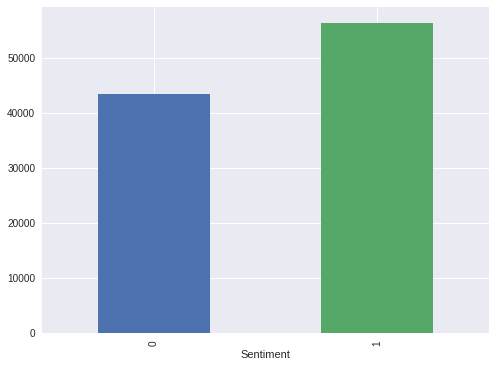

In [5]:
#todo: Import matplot lib library and try to get appropriate data to plot a graph for better understanding.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train.groupby('Sentiment').SentimentText.count().plot.bar(ylim=0)
plt.show()

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#count vector
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopWords=stopwords.words('english')
twits=['This is so amazing',
      'ML is the best, yes it is',
      'I am not sure about how this is going to end...']
count=CountVectorizer(stop_words=stopWords,min_df=1)
bag=count.fit_transform(twits)
count.vocabulary_
bag=bag.toarray()

In [0]:
#termfrequency inverese frequency for relevant words
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
bag=tfidf.fit_transform(bag).toarray()


In [8]:
#work with real dataset
from collections import Counter
vocab=Counter()
for twit in train.SentimentText:
    for word in twit.split(' '):
        vocab[word] += 1    
vocab.most_common(20)

[('', 123916),
 ('I', 32879),
 ('to', 28810),
 ('the', 28087),
 ('a', 21321),
 ('you', 21180),
 ('i', 15995),
 ('and', 14565),
 ('it', 12818),
 ('my', 12385),
 ('for', 12149),
 ('in', 11199),
 ('is', 11185),
 ('of', 10326),
 ('that', 9181),
 ('on', 9020),
 ('have', 8991),
 ('me', 8255),
 ('so', 7612),
 ('but', 7220)]

In [0]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()


In [0]:
import math

def plot_distribution(vocabulary):

    hist, edges = np.histogram(list(map(lambda x:math.log(x[1]),vocabulary.most_common())), density=True, bins=500)

    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="Word distribution accross all twits")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555", )
    show(p)

plot_distribution(vocab)

In [11]:
import nltk
nltk.download('stopwords')


#remove stopwords from the actual data as noise
from nltk.corpus import stopwords
stop=stopwords.words('english')
vocab_reduced=Counter()
for w,c in vocab.items():
    if not w in stop:
        vocab_reduced[w]=c
vocab_reduced.most_common(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('', 123916),
 ('I', 32879),
 ("I'm", 6416),
 ('like', 5086),
 ('-', 4922),
 ('get', 4864),
 ('u', 4194),
 ('good', 3953),
 ('love', 3494),
 ('know', 3472),
 ('go', 2990),
 ('see', 2868),
 ('one', 2787),
 ('got', 2774),
 ('think', 2613),
 ('&amp;', 2556),
 ('lol', 2419),
 ('going', 2396),
 ('really', 2287),
 ('im', 2200)]

In [0]:
#remove preprossesing
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [0]:
#another method is stemming for removing
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


In [0]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X = train['SentimentText']
y = train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [0]:

from  sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [16]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 89.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 170.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 184.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'vect__ngram_range': [(1, 1)], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's...se_idf': [False], 'vect__norm': [None], 'clf__penalty': ['l1', 'l2'], 'clf__C': [1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [17]:
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__preprocessor': <function preprocessor at 0x7fd9ea6b41e0>, 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fd9eac43048>}
Best accuracy: 0.772


In [18]:
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(X_test, y_test))

Accuracy in test: 0.770


In [0]:
#save the model
import pickle
filename = 'finalized_twit_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [22]:
twits = [
    "This is really bad, I don't like it at all",
    "I love this!",
    ":)",
    "I'm sad... :("
]

preds = clf.predict(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> {preds[i]}')

This is really bad, I don't like it at all --> 0
I love this! --> 1
:) --> 1
I'm sad... :( --> 0


In [23]:
tweets=["I m feeling so lazy and want to leave this world"]
prediction=clf.predict(tweets)
prediction

array([0])

In [0]:
import pickle
filename = 'finalized_text_preprocessor_model.sav'
pickle.dump(preprocessor, open(filename, 'wb'))